In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### Load data

In [2]:
# read data from file
data = pd.read_csv('./data/house_data.csv')
data.head()

,URL,Adresse,Year build,Pris,Type,Energimærke,Ejerudgift,Boligydelse,Anvendelse,Boligtype,...,Kommunal ejerlav navn,Grundstørrelse,Lands ejerlav kode,Vejareal,Lands ejerlav navn,Primær matrikel,Ejendomsnummer,Kommunal ejerlav kode,Ejendomsværdiskat,Grundskyld
0,https://www.boliga.dk/bolig/1729830/krebsen_78...,Krebsen 78 5700 Svendborg,2006,225000,Andelsbolig,C,NaN,6717,Række kæde eller dobbelthus lodret adskillelse...,Egentlig beboelseslejlighed boligenhed med ege...,...,EGENSE BY EGENS,7221.0,430451.0,0.0,EGENSE BY EGENSE,J,194920.0,19.0,0.0,0.0
1,https://www.boliga.dk/bolig/1729730/fiskeparke...,Fiskeparken 25 Snaptun 7130 Juelsminde,2000,295000,Andelsbolig,C,NaN,6374,Fritliggende enfamiliehus,Egentlig beboelseslejlighed boligenhed med ege...,...,ØSTRUP BY GLUD,9924.0,1100452.0,245.0,ØSTRUP BY GLUD,J,16078.0,160.0,0.0,0.0
2,https://www.boliga.dk/bolig/1729667/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.boliga.dk/bolig/1729849/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.boliga.dk/bolig/1729668/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Select only data for 'Type' 'Villa'

In [3]:
data = data[data['Type'] == 'Villa']

##### Before dropping columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23750 entries, 5 to 38581
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   URL                          23750 non-null  object 
 1   Adresse                      23750 non-null  object 
 2   Year build                   23750 non-null  object 
 3   Pris                         23750 non-null  object 
 4   Type                         23750 non-null  object 
 5   Energimærke                  23256 non-null  object 
 6   Ejerudgift                   23750 non-null  object 
 7   Boligydelse                  0 non-null      object 
 8   Anvendelse                   23750 non-null  object 
 9   Boligtype                    23749 non-null  object 
 10  Enhedsareal                  23750 non-null  object 
 11  Beboelsesareal               23750 non-null  object 
 12  Værelser                     23750 non-null  float64
 13  Antal toiletter 

##### Drop non-relevant columns (incl. Type +  Boligydelse)

In [5]:
data.drop([
    'Vejareal',
    'Lands ejerlav kode',
    'Kommunal ejerlav kode',
    'Ejendomsnummer',
    'Primær matrikel',
    'Lands ejerlav navn',
    'Kommunal ejerlav navn',
    'Matrikelnummer',
    'Afvigende etager',
    'Boligstørrelse tinglyst',
    'Objekt status',
    'Boligstørrelse BBR',
    'Bygningsnummer',
    'Beboelsesareal',
    'URL',
    'Boligydelse',
    'Anvendelse',
    'Type'
], 'columns', inplace=True)

##### Missing values

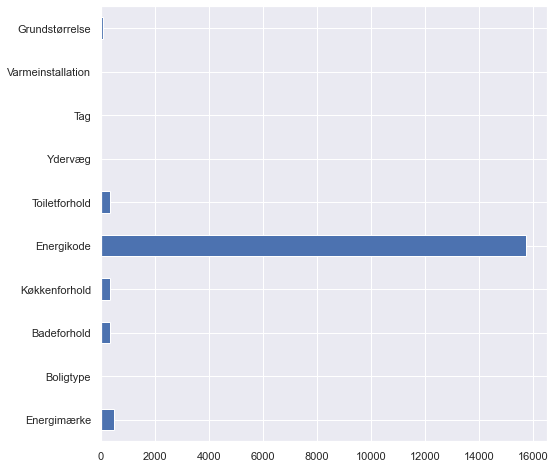

In [6]:
sb.set(font_scale=1)
data_null = data.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');

In [7]:
# drop columns if lot of missing values
data.drop(['Energikode'], 'columns', inplace=True)

In [8]:
# Find missing values in the data and drop those rows:
print('rows before drop n/a',len(data))
bool_matrix = data.isnull() # dataframe with True and False values for each cell in the villa_data
only_null_filter = bool_matrix.any(axis=1) # is there a True value in any column in each row. returns a pandas Series with index matching index of villa dataframe
missing = data[only_null_filter] # show all rows that has one or more null values
data = data.dropna()
print('rows after',len(data))
#pd.options.display.max_rows = None # let me see all rows in the dataframe (can be used with columns too)
#villa_data
#bool_matrix

rows before drop n/a 23750
rows after 22870


##### After dropping columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22870 entries, 5 to 38575
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Adresse                      22870 non-null  object 
 1   Year build                   22870 non-null  object 
 2   Pris                         22870 non-null  object 
 3   Energimærke                  22870 non-null  object 
 4   Ejerudgift                   22870 non-null  object 
 5   Boligtype                    22870 non-null  object 
 6   Enhedsareal                  22870 non-null  object 
 7   Værelser                     22870 non-null  float64
 8   Antal toiletter              22870 non-null  float64
 9   Badeforhold                  22870 non-null  object 
 10  Antal badeværelser           22870 non-null  float64
 11  Køkkenforhold                22870 non-null  object 
 12  Toiletforhold                22870 non-null  object 
 13  Ydervæg         

### Format values

In [10]:
# Address to zipcode
data['Adresse'] = data['Adresse'].str.extract(r'(\d{4})').astype('int')

In [11]:
# Year build
data['Year build'] = data['Year build'].astype('int')

In [12]:
# Price
data['Pris'] = data['Pris'].astype('float')

In [13]:
# Ejerudgift
data['Ejerudgift'] = data['Ejerudgift'].astype('float')

In [14]:
# Enhedsareal
data['Enhedsareal'] = data['Enhedsareal'].astype('float')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22870 entries, 5 to 38575
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Adresse                      22870 non-null  int32  
 1   Year build                   22870 non-null  int32  
 2   Pris                         22870 non-null  float64
 3   Energimærke                  22870 non-null  object 
 4   Ejerudgift                   22870 non-null  float64
 5   Boligtype                    22870 non-null  object 
 6   Enhedsareal                  22870 non-null  float64
 7   Værelser                     22870 non-null  float64
 8   Antal toiletter              22870 non-null  float64
 9   Badeforhold                  22870 non-null  object 
 10  Antal badeværelser           22870 non-null  float64
 11  Køkkenforhold                22870 non-null  object 
 12  Toiletforhold                22870 non-null  object 
 13  Ydervæg         

##### Numerical data

In [16]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Adresse,Year build,Pris,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Carport,Seneste ombygning,Udhus,Boligstørrelse,Boligenhed med eget køkken,Boligenhed uden eget køkken,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,22870.000000,22870.000000,2.287000e+04,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000,22870.000000
mean,6726.924792,1944.464582,2.278292e+06,2459.835942,161.333406,5.163620,1.680280,1.378094,1.033581,1.372234,886.171928,1.513511,133.930564,1.005334,0.002842,1959.639265,10581.997289,9339.400437
std,2097.234964,68.470341,2.324226e+06,1689.445639,61.946787,1.706089,0.665097,0.567289,0.187292,7.216243,987.998702,9.876945,55.415410,0.139862,0.064390,6664.143774,9139.674495,10875.883009
min,2000.000000,0.000000,1.450000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,4000.000000,1892.000000,6.950000e+05,1281.000000,101.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,76.000000,1.000000,0.000000,460.000000,4400.000000,2148.000000
25%,4912.000000,1922.000000,9.990000e+05,1608.000000,124.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,96.000000,1.000000,0.000000,700.000000,6200.000000,3674.000000
50%,6823.000000,1957.000000,1.695000e+06,2093.000000,152.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,125.000000,1.000000,0.000000,867.000000,8925.000000,6603.000000
75%,8660.000000,1973.000000,2.745000e+06,2780.000000,186.000000,6.000000,2.000000,2.000000,1.000000,0.000000,1984.000000,0.000000,161.000000,1.000000,0.000000,1182.000000,12600.000000,10727.000000
90%,9490.000000,1998.000000,4.295000e+06,3862.100000,228.000000,7.000000,2.000000,2.000000,1.000000,0.000000,2001.000000,0.000000,200.000000,1.000000,0.000000,2602.100000,17850.000000,18666.000000
max,9990.000000,2021.000000,5.950000e+07,62140.000000,1900.000000,46.000000,19.000000,9.000000,4.000000,140.000000,2020.000000,282.000000,1393.000000,6.000000,5.000000,265692.000000,323200.000000,287046.000000


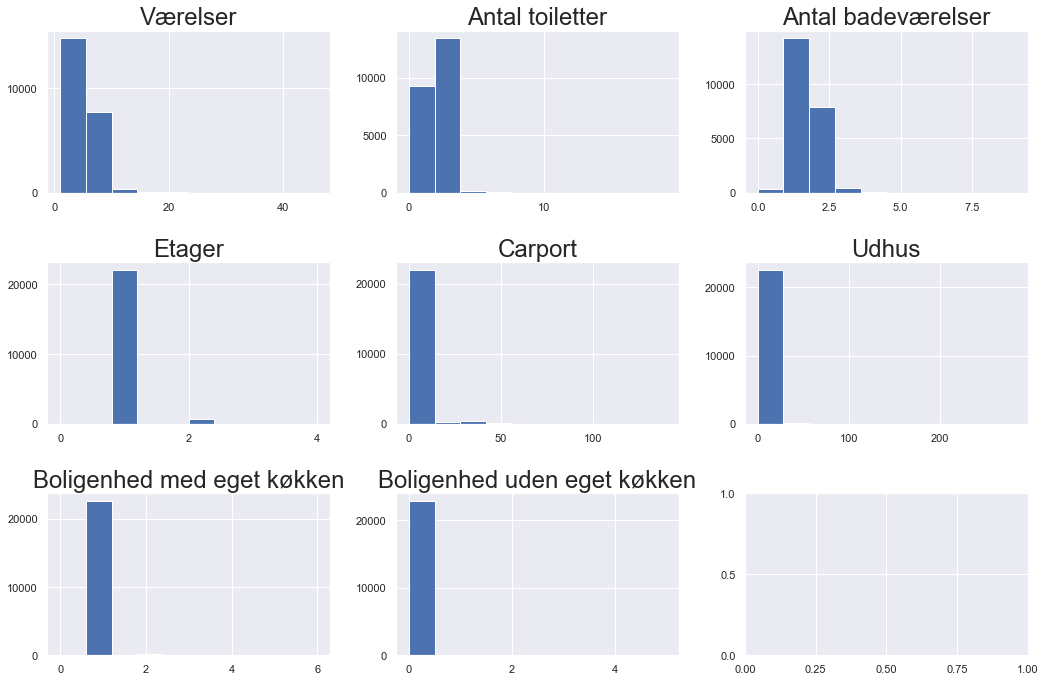

In [17]:
#pick out features, which have one dominant value in the whole sample
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
sb.set(font_scale=2)

data['Værelser'].hist(ax=axes[0,0])
axes[0,0].set_title('Værelser')

data['Antal toiletter'].hist(ax=axes[0,1])
axes[0,1].set_title('Antal toiletter')

data['Antal badeværelser'].hist(ax=axes[0,2])
axes[0,2].set_title('Antal badeværelser')

data['Etager'].hist(ax=axes[1,0])
axes[1,0].set_title('Etager')

data['Carport'].hist(ax=axes[1,1])
axes[1,1].set_title('Carport')

data['Udhus'].hist(ax=axes[1,2])
axes[1,2].set_title('Udhus')

data['Boligenhed med eget køkken'].hist(ax=axes[2,0])
axes[2,0].set_title('Boligenhed med eget køkken')

data['Boligenhed uden eget køkken'].hist(ax=axes[2,1])
axes[2,1].set_title('Boligenhed uden eget køkken')

plt.tight_layout()

# drop features
data.drop([
    'Carport',
    'Udhus',
    'Boligenhed med eget køkken',
    'Boligenhed uden eget køkken'
], 'columns', inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22870 entries, 5 to 38575
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Adresse             22870 non-null  int32  
 1   Year build          22870 non-null  int32  
 2   Pris                22870 non-null  float64
 3   Energimærke         22870 non-null  object 
 4   Ejerudgift          22870 non-null  float64
 5   Boligtype           22870 non-null  object 
 6   Enhedsareal         22870 non-null  float64
 7   Værelser            22870 non-null  float64
 8   Antal toiletter     22870 non-null  float64
 9   Badeforhold         22870 non-null  object 
 10  Antal badeværelser  22870 non-null  float64
 11  Køkkenforhold       22870 non-null  object 
 12  Toiletforhold       22870 non-null  object 
 13  Ydervæg             22870 non-null  object 
 14  Tag                 22870 non-null  object 
 15  Etager              22870 non-null  float64
 16  Sene

### Categorical features

In [19]:
# Energimærke
data.Energimærke.unique()

array(['F', 'D', 'E', 'C', 'G', 'B', 'A10', 'A15', 'A20', 'A', '0', 'A2',
       'A1'], dtype=object)

In [20]:
pd.set_option('display.max_columns', 40)
data.describe(include='all')

,Adresse,Year build,Pris,Energimærke,Ejerudgift,Boligtype,Enhedsareal,Værelser,Antal toiletter,Badeforhold,Antal badeværelser,Køkkenforhold,Toiletforhold,Ydervæg,Tag,Etager,Seneste ombygning,Boligstørrelse,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,22870.000000,22870.000000,2.287000e+04,22870,22870.000000,22870,22870.000000,22870.000000,22870.000000,22870,22870.000000,22870,22870,22870,22870,22870.000000,22870.000000,22870.000000,22870,22870.000000,22870.000000,22870.000000
unique,NaN,NaN,NaN,13,NaN,6,NaN,NaN,NaN,3,NaN,4,3,11,12,NaN,NaN,NaN,9,NaN,NaN,NaN
top,NaN,NaN,NaN,D,NaN,Egentlig beboelseslejlighed boligenhed med ege...,NaN,NaN,NaN,Badeværelse i enheden,NaN,Eget køkken med afløb,Vandskyllende toilet i enheden,Mursten,Fibercement herunder asbest,NaN,NaN,NaN,Fjernvarme blokvarme,NaN,NaN,NaN
freq,NaN,NaN,NaN,7335,NaN,22345,NaN,NaN,NaN,22578,NaN,22786,22831,20568,9646,NaN,NaN,NaN,10121,NaN,NaN,NaN
mean,6726.924792,1944.464582,2.278292e+06,NaN,2459.835942,NaN,161.333406,5.163620,1.680280,NaN,1.378094,NaN,NaN,NaN,NaN,1.033581,886.171928,133.930564,NaN,1959.639265,10581.997289,9339.400437
std,2097.234964,68.470341,2.324226e+06,NaN,1689.445639,NaN,61.946787,1.706089,0.665097,NaN,0.567289,NaN,NaN,NaN,NaN,0.187292,987.998702,55.415410,NaN,6664.143774,9139.674495,10875.883009
min,2000.000000,0.000000,1.450000e+05,NaN,0.000000,NaN,0.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,15.000000,NaN,0.000000,0.000000,0.000000
25%,4912.000000,1922.000000,9.990000e+05,NaN,1608.000000,NaN,124.000000,4.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,96.000000,NaN,700.000000,6200.000000,3674.000000
50%,6823.000000,1957.000000,1.695000e+06,NaN,2093.000000,NaN,152.000000,5.000000,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,125.000000,NaN,867.000000,8925.000000,6603.000000
75%,8660.000000,1973.000000,2.745000e+06,NaN,2780.000000,NaN,186.000000,6.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,1.000000,1984.000000,161.000000,NaN,1182.000000,12600.000000,10727.000000


<ipython-input-21-b9d3612452f7>:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


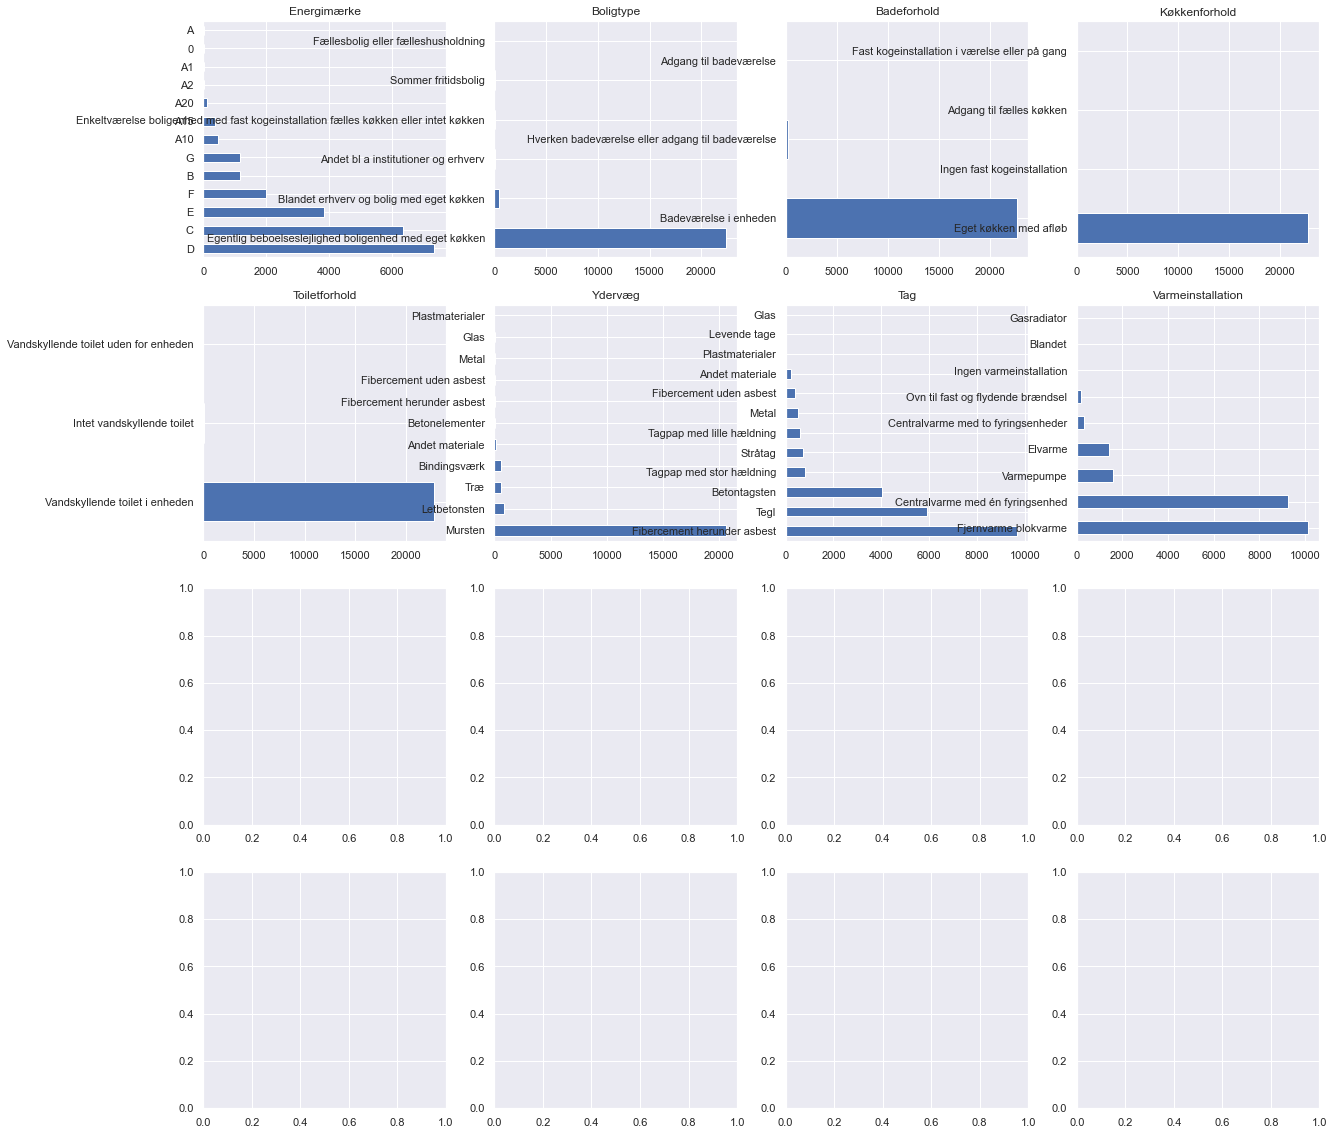

In [21]:
sb.set()
lst_out = ['Energimærke', 'Boligtype', 'Badeforhold',
           'Køkkenforhold', 'Toiletforhold',
           'Ydervæg', 'Tag', 'Varmeinstallation']
sb.set(font_scale=1)
n_row = 4
n_col = 4
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
for i in enumerate(lst_out):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

# drop features
data.drop([
    'Boligtype',
    'Badeforhold',
    'Køkkenforhold',
    'Toiletforhold'
], 'columns', inplace=True)

##### Corrplot

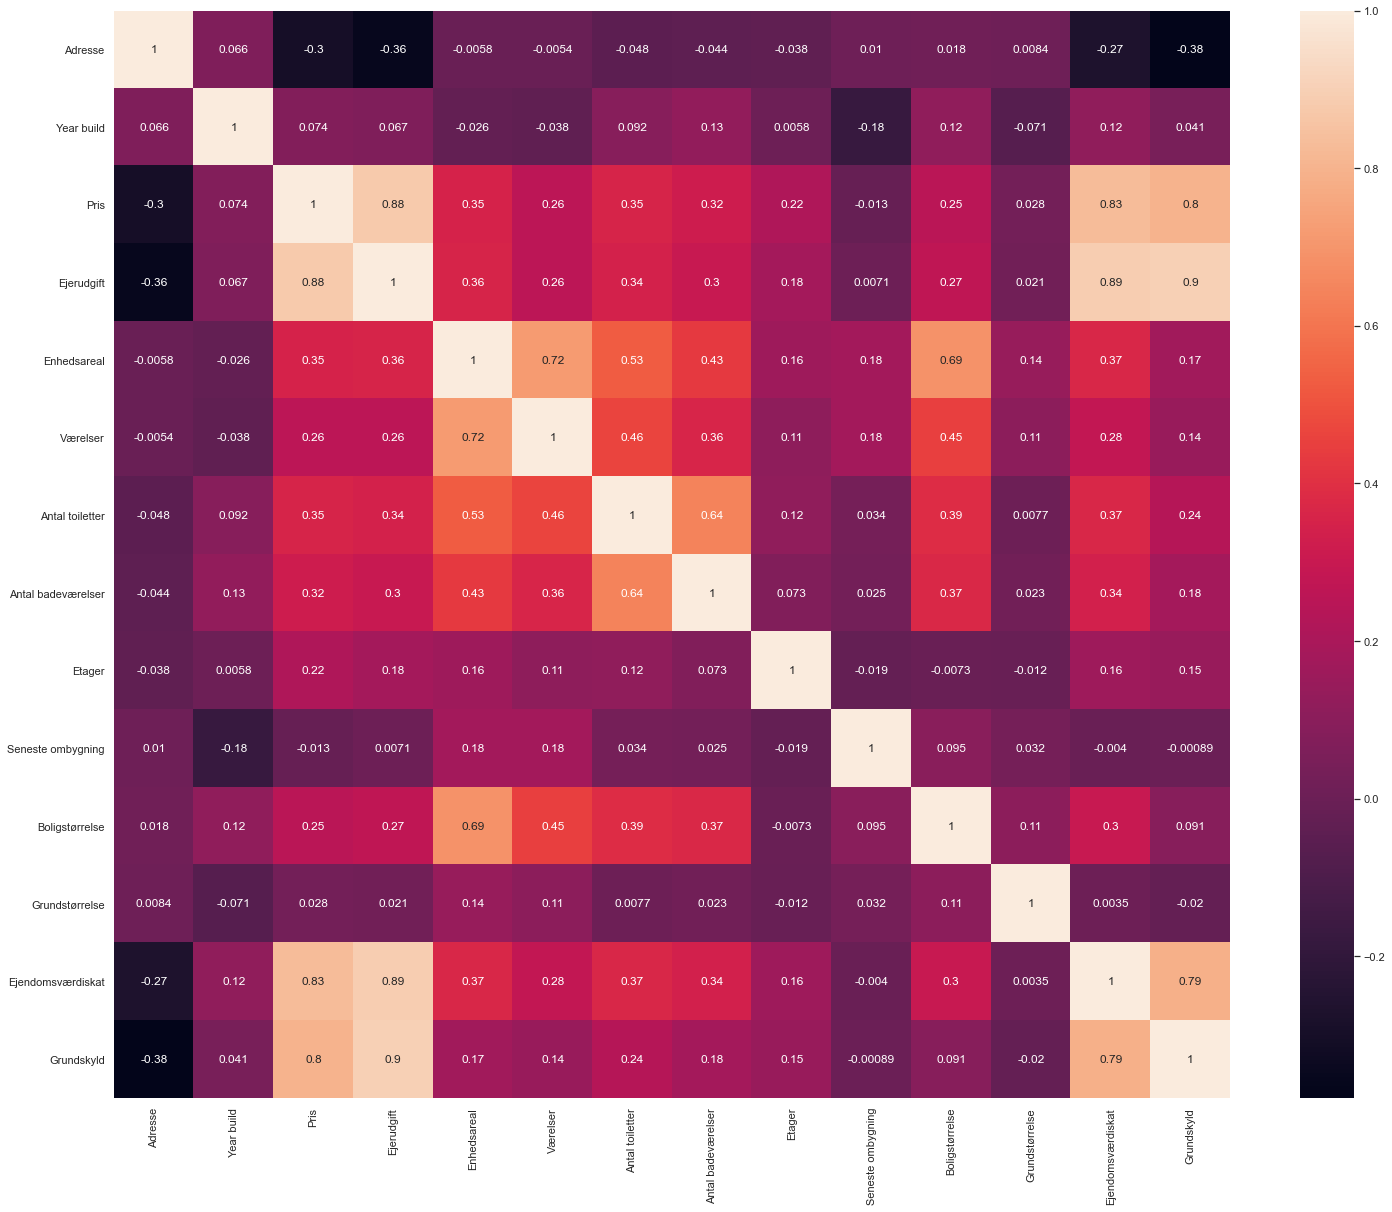

In [22]:
plt.figure(figsize=(25,20))
sb.set(font_scale=1)
sb.heatmap(data.corr(),annot=True);

In [23]:
# dropping most correlated features
#data.drop(['Antal toiletter', 'Ejendomsværdiskat', 'Grundskyld', 'Ejerudgift'], 'columns', inplace=True)
data.drop(['Ejendomsværdiskat', 'Grundskyld'], 'columns', inplace=True)

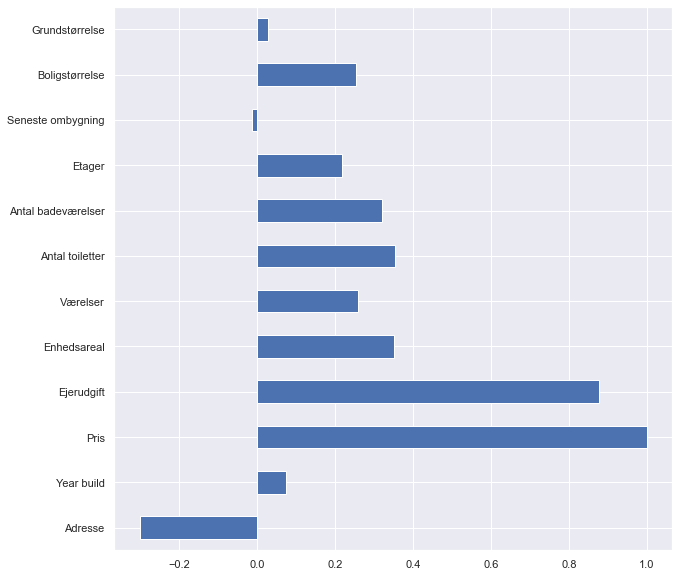

In [24]:
plt.figure(figsize=(10,10))
data.corr()['Pris'].plot(kind='barh');

##### Target

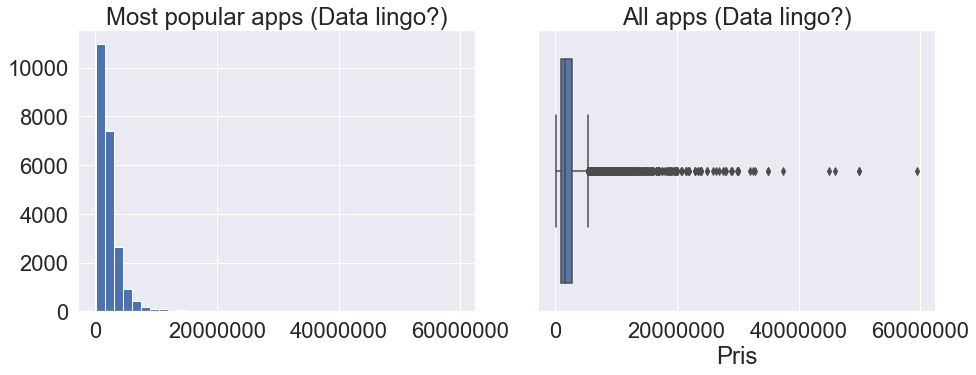

In [25]:
fig = plt.figure(figsize=(20,10))
sb.set(font_scale=2)
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Most popular apps (Data lingo?)')
ax1.ticklabel_format(style='plain')
data['Pris'].hist(bins=40);

ax2 = fig.add_subplot(2,3,2)
ax2.set_title('All apps (Data lingo?)')
ax2.ticklabel_format(style='plain')
sb.boxplot(x=data['Pris'])
plt.tight_layout()

In [26]:
# drop data with abnormal target value
print(pd.value_counts(data['Pris']<8000000))
data = data[data['Pris']<8000000]
#target_val = data_new['SalePrice'].values
data.head()

True     22407
False      463
Name: Pris, dtype: int64


,Adresse,Year build,Pris,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Boligstørrelse,Varmeinstallation,Grundstørrelse
5,9800,1939,395000.0,F,1146.0,110.0,3.0,1.0,1.0,Mursten,Fibercement herunder asbest,1.0,0.0,68.0,Centralvarme med én fyringsenhed,575.0
13,7830,1957,460000.0,D,1029.0,76.0,3.0,1.0,1.0,Mursten,Fibercement herunder asbest,1.0,0.0,76.0,Fjernvarme blokvarme,1000.0
16,4850,1906,475000.0,D,1057.0,80.0,3.0,1.0,1.0,Mursten,Tegl,1.0,0.0,51.0,Fjernvarme blokvarme,118.0
17,8970,1900,495000.0,E,1104.0,135.0,4.0,1.0,1.0,Mursten,Fibercement herunder asbest,1.0,1977.0,135.0,Centralvarme med én fyringsenhed,1119.0
18,6940,1944,465000.0,C,1167.0,55.0,2.0,1.0,0.0,Mursten,Betontagsten,1.0,0.0,67.0,Fjernvarme blokvarme,753.0


##### Split data to numeric and categorical

In [27]:
numer = set(data.corr()['Pris'].index)
categ = list(set(data.columns) - set(data.corr()['Pris'].index))

In [28]:
numer

{'Adresse',
 'Antal badeværelser',
 'Antal toiletter',
 'Boligstørrelse',
 'Ejerudgift',
 'Enhedsareal',
 'Etager',
 'Grundstørrelse',
 'Pris',
 'Seneste ombygning',
 'Værelser',
 'Year build'}

In [29]:
categ

['Ydervæg', 'Energimærke', 'Tag', 'Varmeinstallation']

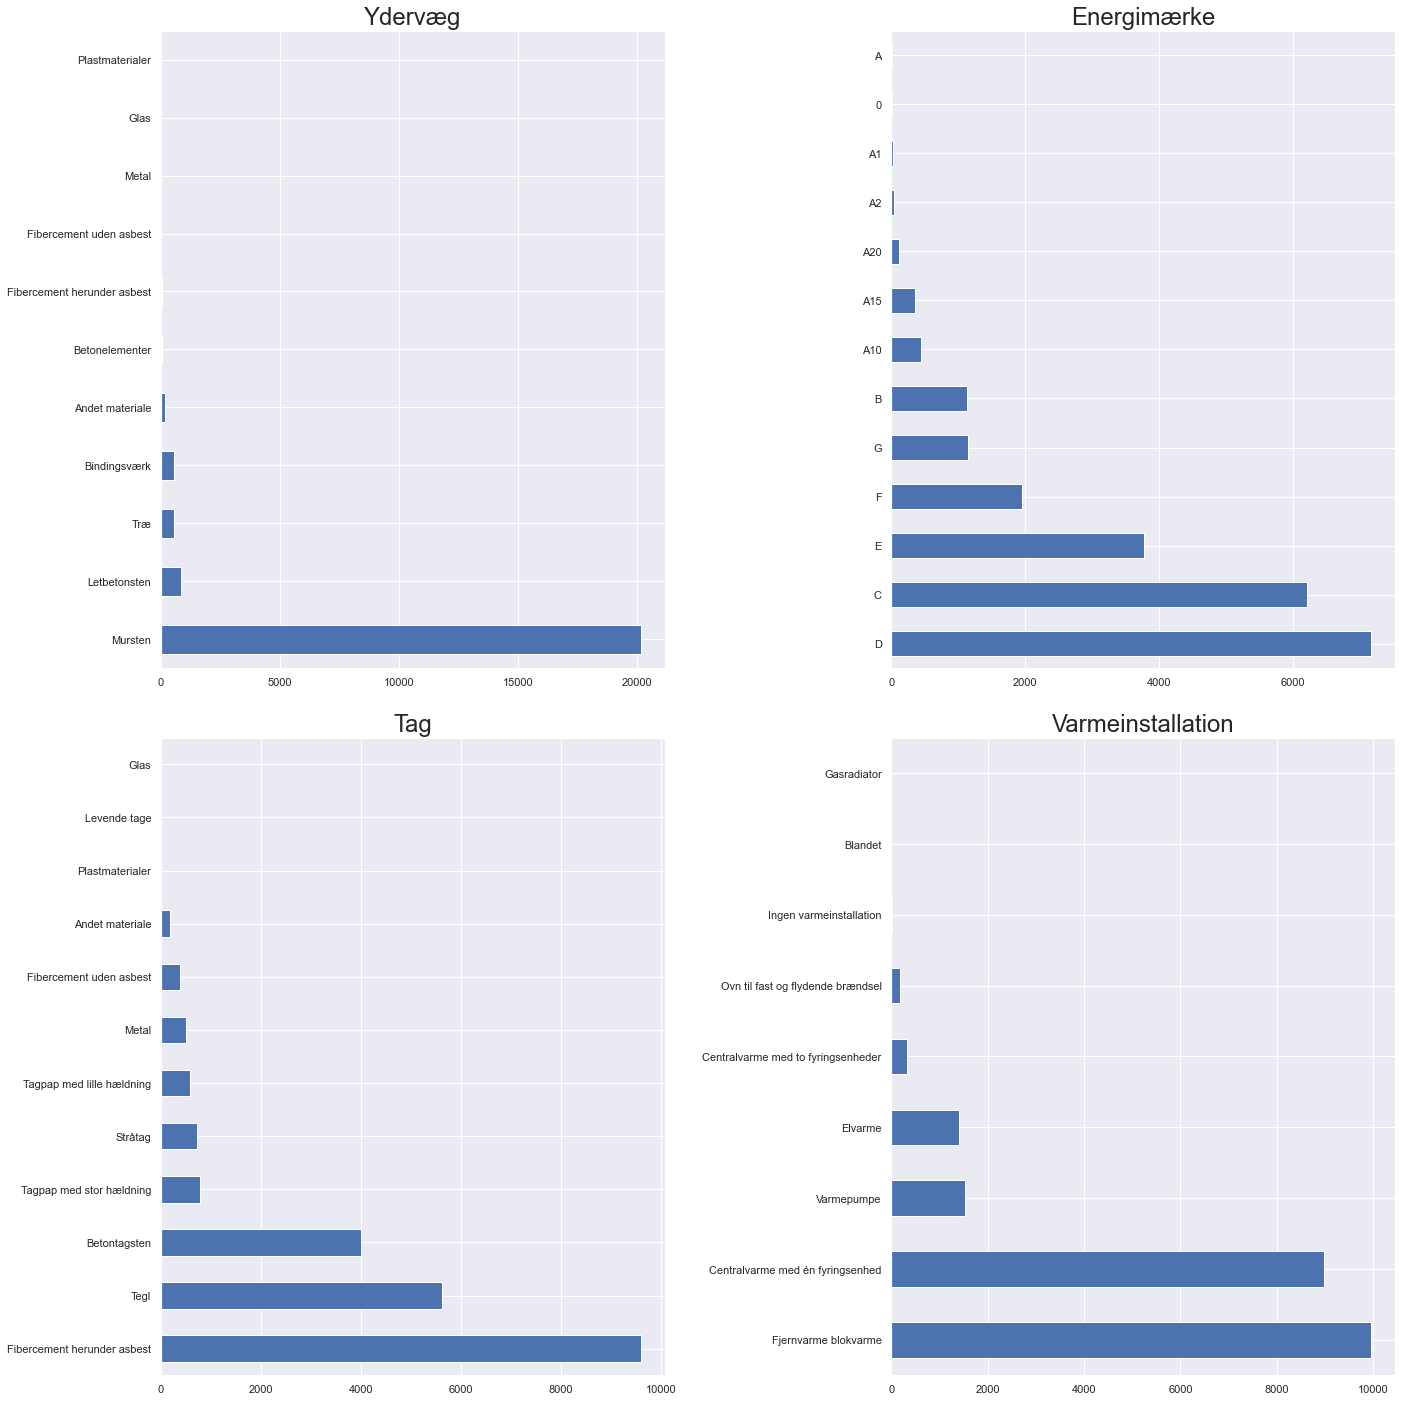

In [30]:
sb.set()
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
sb.set(font_scale=2)
for i in enumerate(categ):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

In [31]:
# bring categories into a numerical format:
for i in categ:
    data[i] = data[i].factorize()[0]
data.head()

,Adresse,Year build,Pris,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Boligstørrelse,Varmeinstallation,Grundstørrelse
5,9800,1939,395000.0,0,1146.0,110.0,3.0,1.0,1.0,0,0,1.0,0.0,68.0,0,575.0
13,7830,1957,460000.0,1,1029.0,76.0,3.0,1.0,1.0,0,0,1.0,0.0,76.0,1,1000.0
16,4850,1906,475000.0,1,1057.0,80.0,3.0,1.0,1.0,0,1,1.0,0.0,51.0,1,118.0
17,8970,1900,495000.0,2,1104.0,135.0,4.0,1.0,1.0,0,0,1.0,1977.0,135.0,0,1119.0
18,6940,1944,465000.0,3,1167.0,55.0,2.0,1.0,0.0,0,2,1.0,0.0,67.0,1,753.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22407 entries, 5 to 38575
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Adresse             22407 non-null  int32  
 1   Year build          22407 non-null  int32  
 2   Pris                22407 non-null  float64
 3   Energimærke         22407 non-null  int64  
 4   Ejerudgift          22407 non-null  float64
 5   Enhedsareal         22407 non-null  float64
 6   Værelser            22407 non-null  float64
 7   Antal toiletter     22407 non-null  float64
 8   Antal badeværelser  22407 non-null  float64
 9   Ydervæg             22407 non-null  int64  
 10  Tag                 22407 non-null  int64  
 11  Etager              22407 non-null  float64
 12  Seneste ombygning   22407 non-null  float64
 13  Boligstørrelse      22407 non-null  float64
 14  Varmeinstallation   22407 non-null  int64  
 15  Grundstørrelse      22407 non-null  float64
dtypes: f

### Linear Regression Model

In [33]:
y = data['Pris']
#X = data.drop(['Pris'], 'columns', inplace=True)
X = data[['Adresse', 'Year build', 'Energimærke', 'Ejerudgift', 'Enhedsareal', 'Værelser', 'Antal toiletter', 'Antal badeværelser',
          'Ydervæg', 'Tag', 'Etager', 'Seneste ombygning', 'Boligstørrelse', 'Varmeinstallation', 'Grundstørrelse']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [34]:
print(coeff_df)

                      Coefficient
Adresse                 -0.731974
Year build             682.092272
Energimærke          93301.830532
Ejerudgift            1001.777499
Enhedsareal            -61.362103
Værelser             15504.393940
Antal toiletter      89943.069048
Antal badeværelser  172058.906891
Ydervæg             -10897.304509
Tag                  33297.342158
Etager              303856.156017
Seneste ombygning      -23.101019
Boligstørrelse        -443.386973
Varmeinstallation     2943.205485
Grundstørrelse           3.672598


In [40]:
print('training score')
print(lm.score(X_train, y_train))

training score
0.7184362655555864


In [41]:
print('test score')
print(lm.score(X_test, y_test))

test score
0.7406856838319167


In [42]:
predictions = lm.predict(X_test)

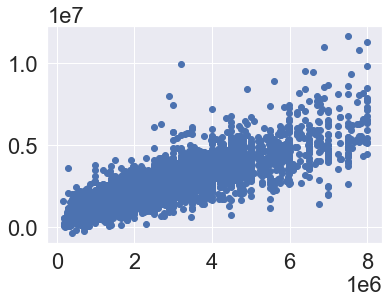

In [43]:
plt.scatter(y_test, predictions)

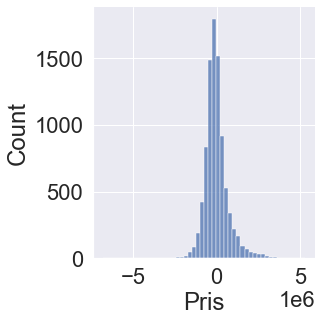

In [44]:
sb.displot((y_test-predictions), bins=50)

### Cluster (Not relevant now)

In [39]:
# # cut target to 5 parts and see to the distribution. So I will check significance of features to the target.
# cut_value = pd.cut(data['Pris'],5).values
# data['Pris'] = cut_value
# sb.set(font_scale=2)
# n_row = 4
# n_col = 4
# categ_targ = set(categ)
# fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
# sb.set(font_scale=2)
# sb.axes_style("whitegrid")

# for i in enumerate(categ_targ):
#     qq=sb.countplot(data[i[1]],ax=axes[i[0]//n_row,i[0]%n_col],\
#                      hue=data['Pris'])
#     qq.legend_.remove()
# plt.legend().set_title('')
# plt.tight_layout()